<a href="https://colab.research.google.com/github/SA2804/YT-channel-data-analysis/blob/main/YT_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install the dependencies if it does not exist :

In [ ]:
!pip install google-api-python-client

In [ ]:
## import basic modules
from googleapiclient.discovery import build
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from getpass import getpass

API_KEY = getpass("Enter your API key: ")

Enter your API key: ··········


In [ ]:
channel_ids = ["UCAuk798iHprjTtwlClkFxMA", ## Sam Sulek
              "UC6LqnOV2y-QFLK-0Aghph1A", ## Asveth Sreiram
              "UCfgrg0SXgNkZ7rTbnZCp6tg", ## Saket Gokhale
               "UCMp-0bU-PA7BNNR-zIvEydA", ## Noel Deyzel
               "UCbm8FxO0gBbZ19iydL9g3ZQ",  ## Just Merk
               "UCiWPU83VmOXjQ6xY0gIrhIQ", ## Chloe Ting
               "UCe0TLA0EsQbE-MjuHXevj2A", ## Jeff Cavaliere
               "UCzvppQwFxI_7hGFGzYz2y9Q", ## Krissy Cela
               "UCaKZDEMDdQc8t6GzFj1_TDw" ## Tibo InShape
            ]
youtube = build('youtube','v3',developerKey = API_KEY) ## creates a service by taking in 3 parameters - api_service_name,api_version and api_key

## Function to get channel statistics:

In [ ]:
def get_channel_stats(youtube, channel_ids):
    allData = []

    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id=','.join(channel_ids)
    )
    response = request.execute()

    for i in range(len(response['items'])):
        data = {
            'channelTitle': response['items'][i]['snippet']['title'],
            'country': response['items'][i]['snippet'].get('country', 'N/A'),
            'subscriberCount': response['items'][i]['statistics']['subscriberCount'],
            'videoCount': response['items'][i]['statistics']['videoCount'],
            'viewCount': response['items'][i]['statistics']['viewCount'],
            'playlistID':response['items'][i]['contentDetails']['relatedPlaylists']['uploads']
        }
        allData.append(data)

    return allData

channel_stats = get_channel_stats(youtube, channel_ids)
print(channel_stats)  # Print the collected data


[{'channelTitle': 'JustMerk', 'country': 'US', 'subscriberCount': '776000', 'videoCount': '208', 'viewCount': '65590007', 'playlistID': 'UUbm8FxO0gBbZ19iydL9g3ZQ'}, {'channelTitle': 'Asveth Sreiram', 'country': 'N/A', 'subscriberCount': '237000', 'videoCount': '358', 'viewCount': '60193203', 'playlistID': 'UU6LqnOV2y-QFLK-0Aghph1A'}, {'channelTitle': 'fabulous50s', 'country': 'US', 'subscriberCount': '1940000', 'videoCount': '713', 'viewCount': '212697917', 'playlistID': 'UUiWPU83VmOXjQ6xY0gIrhIQ'}, {'channelTitle': 'Sam Sulek', 'country': 'US', 'subscriberCount': '4050000', 'videoCount': '737', 'viewCount': '259707066', 'playlistID': 'UUAuk798iHprjTtwlClkFxMA'}, {'channelTitle': 'Be Inspired', 'country': 'RO', 'subscriberCount': '9100000', 'videoCount': '376', 'viewCount': '479350244', 'playlistID': 'UUaKZDEMDdQc8t6GzFj1_TDw'}, {'channelTitle': 'ATHLEAN-X™', 'country': 'US', 'subscriberCount': '14000000', 'videoCount': '1565', 'viewCount': '2593021658', 'playlistID': 'UUe0TLA0EsQbE-Mj

## Load the data into Pandas:

In [ ]:
df = pd.DataFrame(channel_stats)
df

,channelTitle,country,subscriberCount,videoCount,viewCount,playlistID
0,JustMerk,US,776000,208,65590007,UUbm8FxO0gBbZ19iydL9g3ZQ
1,Asveth Sreiram,N/A,237000,358,60193203,UU6LqnOV2y-QFLK-0Aghph1A
2,fabulous50s,US,1940000,713,212697917,UUiWPU83VmOXjQ6xY0gIrhIQ
3,Sam Sulek,US,4050000,737,259707066,UUAuk798iHprjTtwlClkFxMA
4,Be Inspired,RO,9100000,376,479350244,UUaKZDEMDdQc8t6GzFj1_TDw
5,ATHLEAN-X™,US,14000000,1565,2593021658,UUe0TLA0EsQbE-MjuHXevj2A
6,Saket Gokhale,IN,1930000,827,258352739,UUfgrg0SXgNkZ7rTbnZCp6tg
7,Noel Deyzel,ZA,7070000,417,3390792840,UUMp-0bU-PA7BNNR-zIvEydA


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   channelTitle     8 non-null      object
 1   country          8 non-null      object
 2   subscriberCount  8 non-null      object
 3   videoCount       8 non-null      object
 4   viewCount        8 non-null      object
 5   playlistID       8 non-null      object
dtypes: object(6)
memory usage: 516.0+ bytes


# Clean the data by changing the data types:




In [ ]:
df['subscriberCount']=df['subscriberCount'].astype(int)
df['videoCount']=df['videoCount'].astype(int)
df['viewCount']=df['viewCount'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   channelTitle     8 non-null      object
 1   country          8 non-null      object
 2   subscriberCount  8 non-null      int64 
 3   videoCount       8 non-null      int64 
 4   viewCount        8 non-null      int64 
 5   playlistID       8 non-null      object
dtypes: int64(3), object(3)
memory usage: 516.0+ bytes


# Data Analysis and Visualizations:

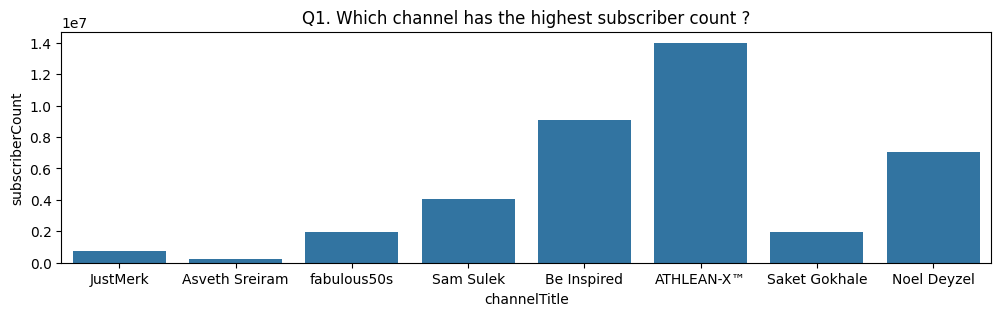

In [ ]:
plt.figure(figsize=(12,3))

plt.title('Q1. Which channel has the highest subscriber count ?')
sns.barplot(x='channelTitle',y='subscriberCount',data=df)

plt.show()

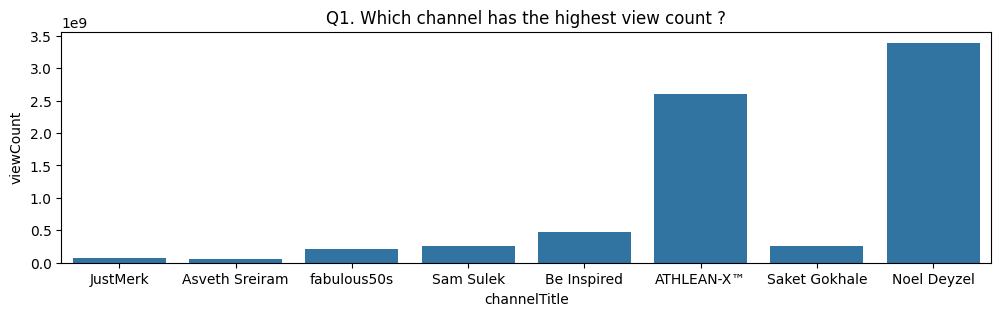

In [ ]:
plt.figure(figsize=(12,3))

plt.title('Q1. Which channel has the highest view count ?')
sns.barplot(x='channelTitle',y='viewCount',data=df)

plt.show()

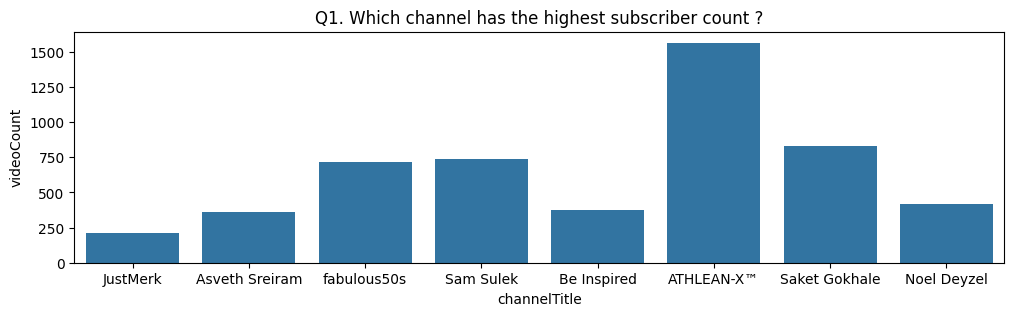

In [ ]:
plt.figure(figsize=(12,3))

plt.title('Q1. Which channel has the highest subscriber count ?')
sns.barplot(x='channelTitle',y='videoCount',data=df)

plt.show()

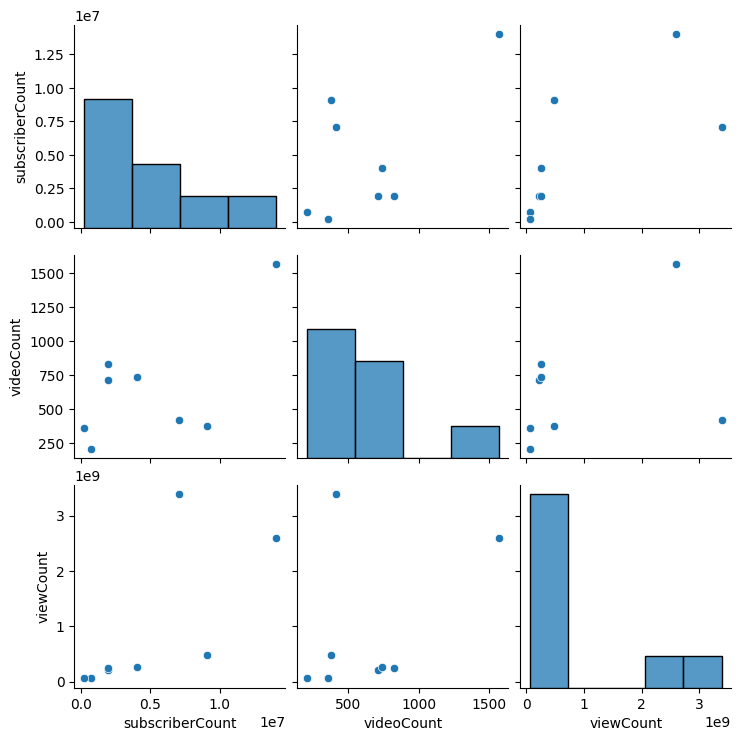

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
playlist_id = df.loc[df['channelTitle']=='Saket Gokhale','playlistID'].iloc[0]
print(type(playlist_id),playlist_id,'Saket Gokhale\'s id')

<class 'str'> UUfgrg0SXgNkZ7rTbnZCp6tg Saket Gokhale's id


In [ ]:
def get_video_ids(youtube,playlist_id):
    req = youtube.playlistItems().list(
        part='contentDetails',
        playlistId=playlist_id,
        maxResults=50 ## 50 is the max it can return
    )
    res=req.execute()
    v_id=[]
    for i in range(len(res['items'])):
        v_id.append(res['items'][i]['contentDetails']['videoId'])

     ## total results = 827 but returned only 5 per page at max 50 records
    ### USING NEXT PAGE TOKEN WE CAN ACCESS OTHER RECORDS AFTER 50 !!!

    next_page_token = res.get('nextPageToken') ## if not present returns None
    morePages=True

    while morePages:
        if next_page_token is None:
            morePages=False
        else:
            req = youtube.playlistItems().list(
            part='contentDetails',
            playlistId=playlist_id,
            maxResults=50, ## 50 is the max it can return
            pageToken = next_page_token
            )

            res=req.execute()

            for i in range(len(res['items'])):
                v_id.append(res['items'][i]['contentDetails']['videoId'])

            next_page_token=res.get('nextPageToken')

    return v_id

In [ ]:
video_ids = get_video_ids(youtube,playlist_id)


# Function to get video details:

In [50]:
def get_video_details(youtube,video_ids):
    ## we can pass only 50 at a time
    all_video_stats=[]
    for i in range(0,len(video_ids),50):
        req = youtube.videos().list(
            part = 'snippet,statistics',
            id = ','.join(video_ids[i:i+50])
        )
        res = req.execute()
        for video in res['items']:
            video_stats=dict(Title=video['snippet']['title'],
                             PublishedDate=video['snippet']['publishedAt'],
                             Views=video['statistics'].get('viewCount'),
                             Likes=video['statistics'].get('likeCount'),
                             Comments=video['statistics'].get('commentCount')
                             )
            all_video_stats.append(video_stats)

    return all_video_stats

In [52]:
video_details = get_video_details(youtube,video_ids)

## Load the Data( Name, Published_Date,Views,Likes and Comments) into a Pandas DataFrame for cleaning it and analyzing it

In [91]:
video_df = pd.DataFrame(video_details)

In [92]:
video_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          827 non-null    object
 1   PublishedDate  827 non-null    object
 2   Views          827 non-null    object
 3   Likes          827 non-null    object
 4   Comments       825 non-null    object
dtypes: object(5)
memory usage: 32.4+ KB


# Clean the video_data before analysis:

In [93]:
video_df['PublishedDate']

,PublishedDate
0,2025-02-28T13:30:24Z
1,2025-02-27T13:30:41Z
2,2025-02-27T10:30:33Z
3,2025-02-26T13:30:13Z
4,2025-02-25T13:30:31Z
...,...
822,2019-10-15T06:50:47Z
823,2019-10-11T13:16:15Z
824,2019-10-03T13:10:18Z
825,2019-09-13T12:58:44Z


In [94]:
## 1. published_Date:
from datetime import datetime
video_df['Published_Date'] = video_df['PublishedDate'].str.split('T').str[0]
video_df['Published_Time'] = video_df['PublishedDate'].str.split('T').str[1].str.split('Z').str[0].apply(lambda x: datetime.strptime(x, "%H:%M:%S").strftime("%I:%M:%S %p"))

In [95]:
video_df[['Published_Date','Published_Time','PublishedDate']]
video_df.drop('PublishedDate',axis=1,inplace=True)
video_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           827 non-null    object
 1   Views           827 non-null    object
 2   Likes           827 non-null    object
 3   Comments        825 non-null    object
 4   Published_Date  827 non-null    object
 5   Published_Time  827 non-null    object
dtypes: object(6)
memory usage: 38.9+ KB


In [96]:
video_df.head()
video_df['Views']=pd.to_numeric(video_df['Views'])
video_df['Likes']=video_df['Likes'].astype(int)

In [99]:
video_df[video_df['Comments'].isnull()]

,Title,Views,Likes,Comments,Published_Date,Published_Time
134,"10 Days in Japan: Tokyo, Kyoto & Osaka",190031,9749,None,2024-11-03,11:36:18 AM
466,i got injured,92425,10513,None,2023-02-10,05:41:35 AM


In [101]:
video_df['Comments'].fillna(0,inplace=True)

In [103]:
video_df['Comments']=video_df['Comments'].astype(int)

### Perform Exploratory Data Analysis on the cleant Data:

In [104]:
video_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           827 non-null    object
 1   Views           827 non-null    int64 
 2   Likes           827 non-null    int64 
 3   Comments        827 non-null    int64 
 4   Published_Date  827 non-null    object
 5   Published_Time  827 non-null    object
dtypes: int64(3), object(3)
memory usage: 38.9+ KB


In [105]:
video_df.head()

,Title,Views,Likes,Comments,Published_Date,Published_Time
0,Day 196 | Chest,35177,6683,38,2025-02-28,01:30:24 PM
1,Day 195 | Legs,54371,8768,35,2025-02-27,01:30:41 PM
2,THE ROADTRIP BEGINS! Goa 2025 Ep.01,97702,6888,330,2025-02-27,10:30:33 AM
3,Day 194 | Arms,86593,12746,79,2025-02-26,01:30:13 PM
4,Day 193 | Back,91865,14763,66,2025-02-25,01:30:31 PM


# 1. Top 10 videos of Saket:

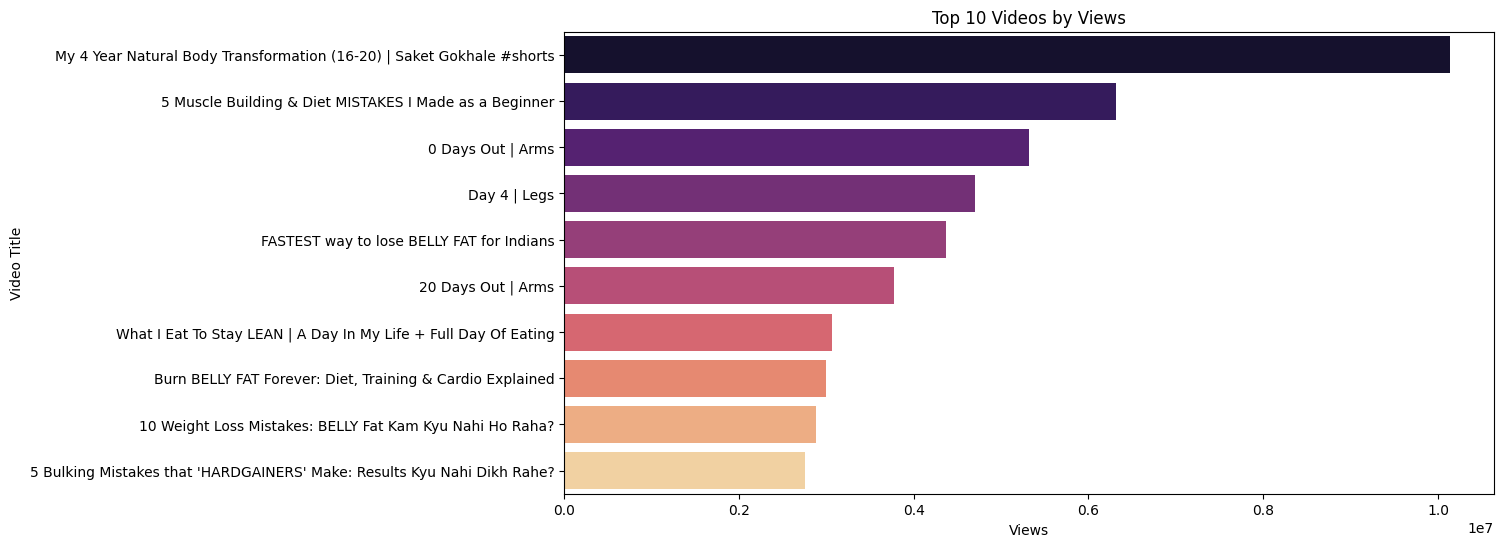

In [119]:
# Select top 10 videos by views
top_videos = video_df.sort_values(by="Views", ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x="Views", y="Title", data=top_videos, hue="Title", palette="magma", legend=False)

# Labels & Title
plt.xlabel("Views")
plt.ylabel("Video Title")
plt.title("Top 10 Videos by Views")
plt.show()

## Q2. How many videos are posted by Saket on an average

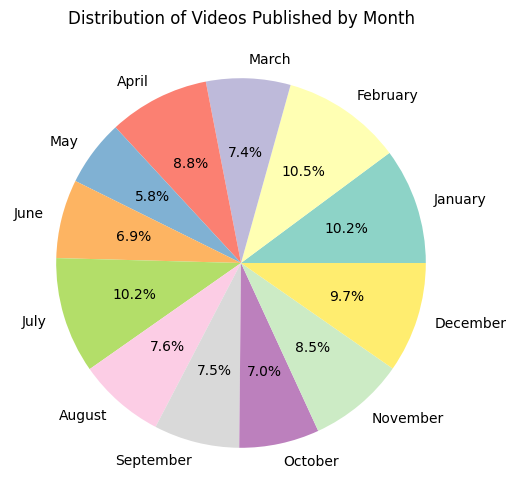

In [156]:
import calendar

# Extract month from Published_Date and convert to int
video_df['Month'] = video_df['Published_Date'].astype(str).str.split('-').str[1].astype(int)

# Convert month number to full month name
video_df["Month"] = video_df["Month"].apply(lambda x: calendar.month_name[x])

# Count occurrences and reorder months correctly
month_counts = video_df['Month'].value_counts().reindex(calendar.month_name[1:])

# Drop NaN values (if any) before visualization
month_counts = month_counts.dropna()

# Create Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(month_counts, labels=month_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set3", len(month_counts)))
plt.title("Distribution of Videos Published by Month")
plt.show()


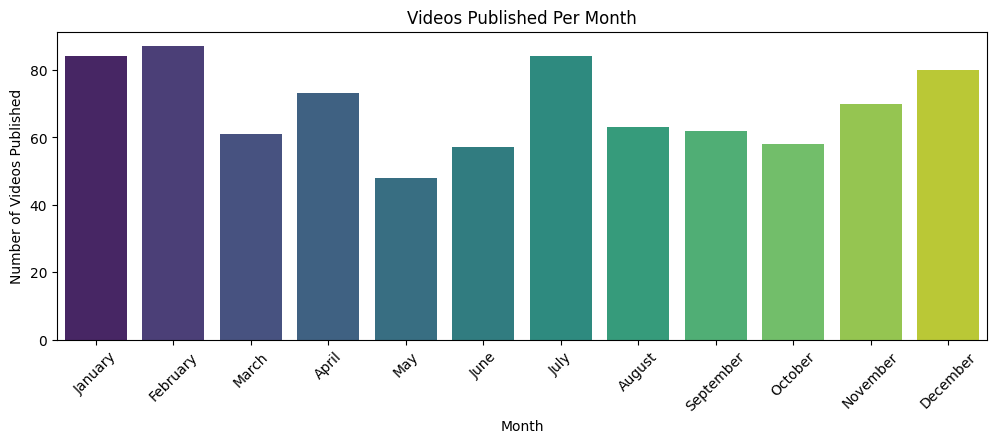

In [159]:
##  Bar Plot
plt.figure(figsize=(12, 4))
sns.barplot(x=month_counts.index, y=month_counts.values, hue=month_counts.index,legend=False,palette="viridis")  # Choose any color palette

plt.xlabel("Month")
plt.ylabel("Number of Videos Published")
plt.title("Videos Published Per Month")
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.show()